In [4]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [5]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170498071/170498071 [==============================] - 145s 1us/step


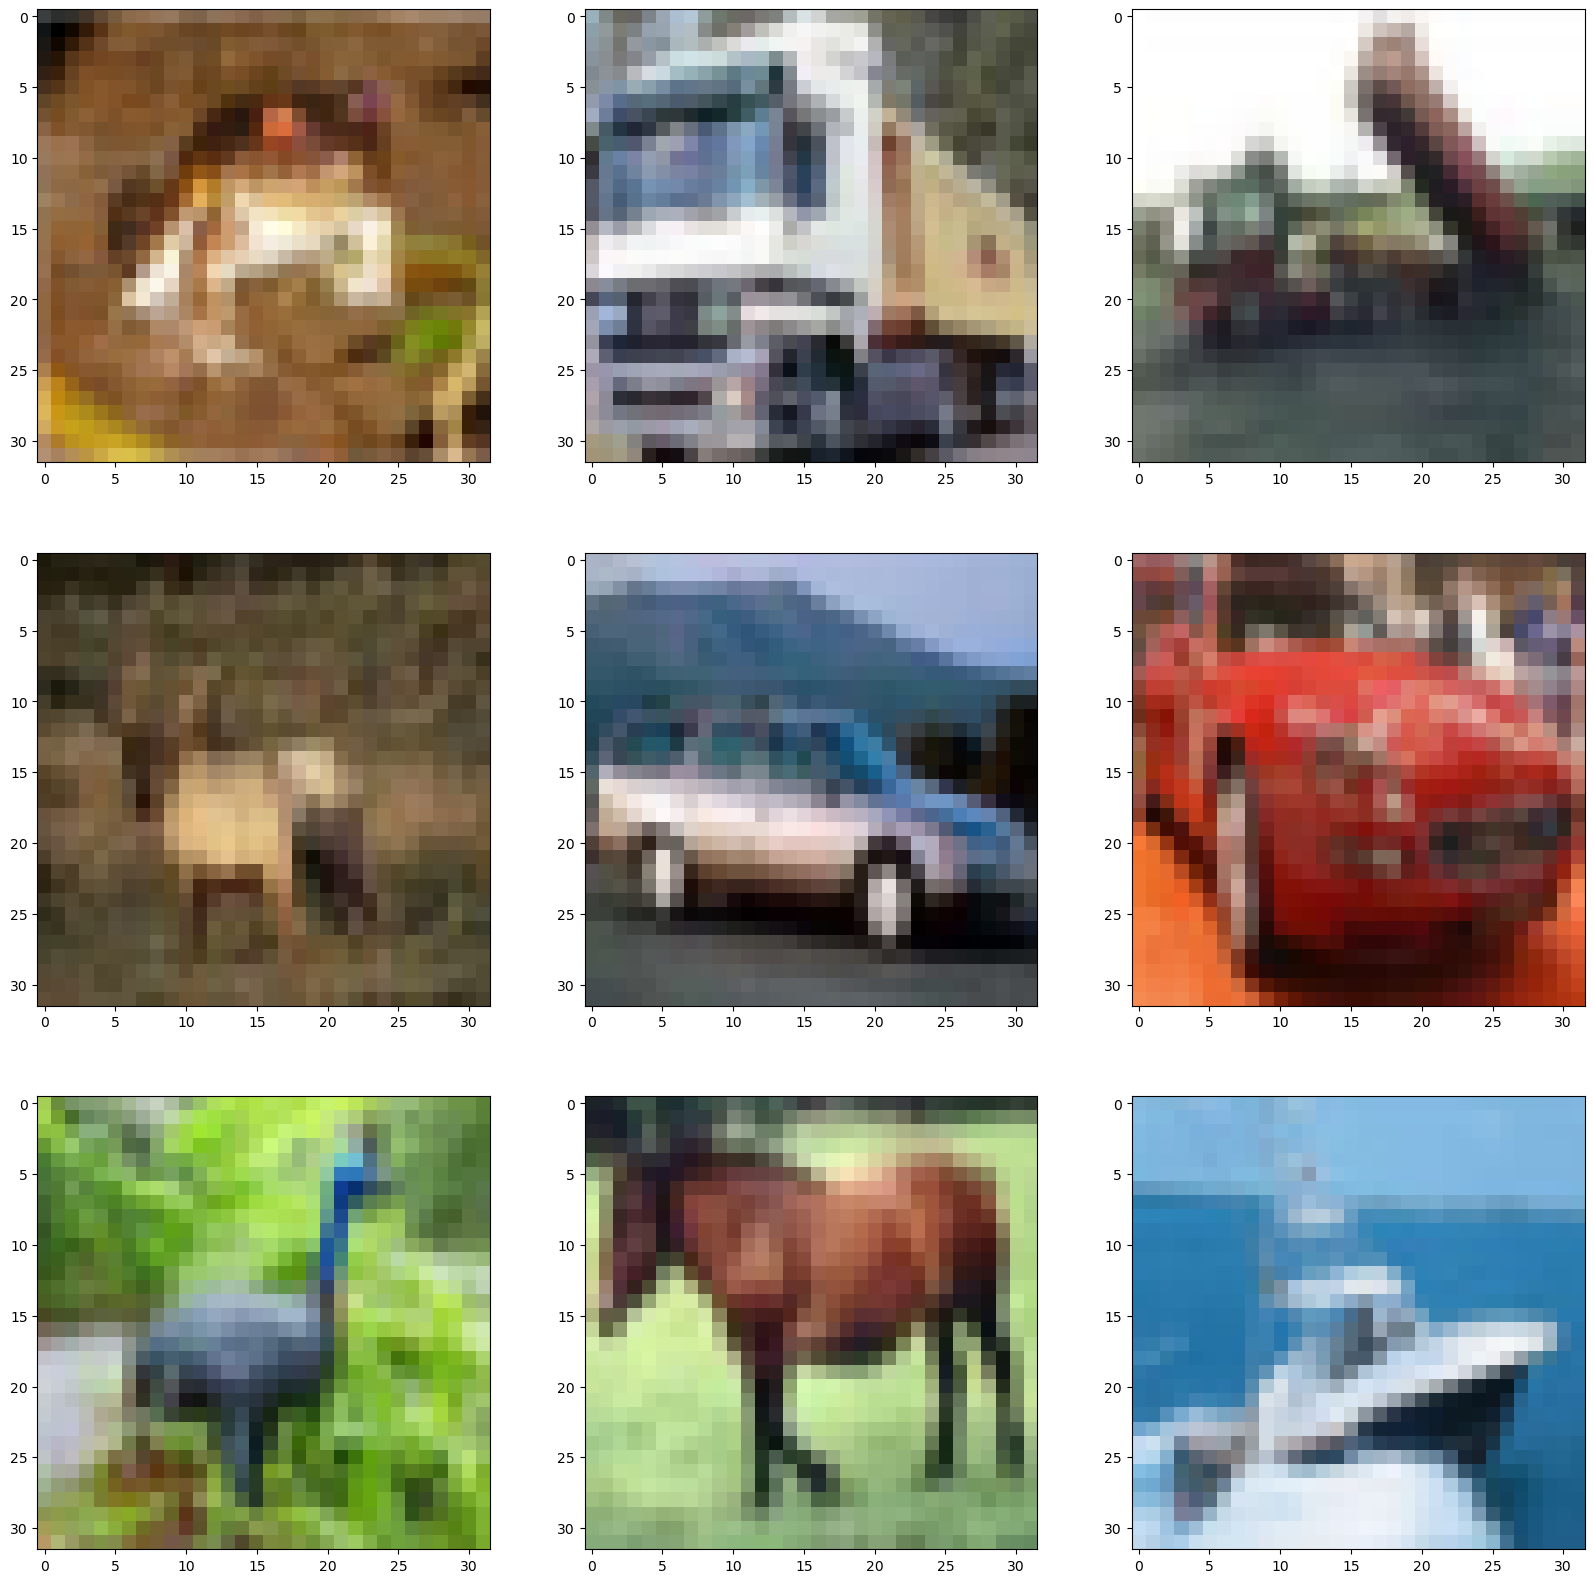

In [68]:
n=9
plt.figure(figsize=(20,20))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [10]:
#converting the data type of train_X and test_X to float32
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
#performing min-max scaling on the data by dividing the pixel values by 255. 
#This rescales the pixel values to be between 0 and 1, which can help the model converge faster during training.
train_X=train_X/255.0
test_X=test_X/255.0

In [11]:
#The np_utils.to_categorical() function from the Keras library is being used to convert the integer labels to 
#a one-hot encoded representation
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same',activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [17]:
model.fit(train_X,train_Y, validation_data=(test_X,test_Y), epochs=10,batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - ETA: 0s - loss: 1.7150 - acc: 0.3812

C:\Users\shaik\anaconda3\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 331s 7ms/sample - loss: 1.7150 - acc: 0.3812 - val_loss: 1.3808 - val_acc: 0.5040
Epoch 2/10
50000/50000 [==============================] - 327s 7ms/sample - loss: 1.3176 - acc: 0.5276 - val_loss: 1.1738 - val_acc: 0.5775
Epoch 3/10
50000/50000 [==============================] - 328s 7ms/sample - loss: 1.1441 - acc: 0.5928 - val_loss: 1.0987 - val_acc: 0.6102
Epoch 4/10
50000/50000 [==============================] - 857s 17ms/sample - loss: 1.0192 - acc: 0.6398 - val_loss: 1.0068 - val_acc: 0.6409
Epoch 5/10
50000/50000 [==============================] - 129s 3ms/sample - loss: 0.9211 - acc: 0.6755 - val_loss: 0.9582 - val_acc: 0.6581
Epoch 6/10
50000/50000 [==============================] - 127s 3ms/sample - loss: 0.8342 - acc: 0.7056 - val_loss: 0.9271 - val_acc: 0.6814
Epoch 7/10
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.7634 - acc: 0.7305 - val_loss: 0.9182 - val_acc: 0.6780
Epoch 8/10
50000/50000 [======

In [18]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

69.45000290870667


In [19]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}


In [59]:
from PIL import Image
import numpy as np
im=Image.open('FELV-cat.jpg')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred_probabilities = model.predict(im)
pred = np.argmax(pred_probabilities, axis=1)[0]
print(pred,results[pred])



3 cat
